[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1o7SoVlQ-2SxjqKL7A1Dk2TbMx-utJXf2?usp=sharing)

# API Basics

In this tutorial, we will cover basic functionalities supported by `lineapy` using simple examples.

**Table of Contents**

- [Storing an artifact with save()](#Storing-an-artifact-with-save())
- [Listing artifacts with catalog()](#Listing-artifacts-with-catalog())
- [Retrieving an artifact with get()](#Retrieving-an-artifact-with-get())
- [Using artifacts to build pipelines](#Using-artifacts-to-build-pipelines)

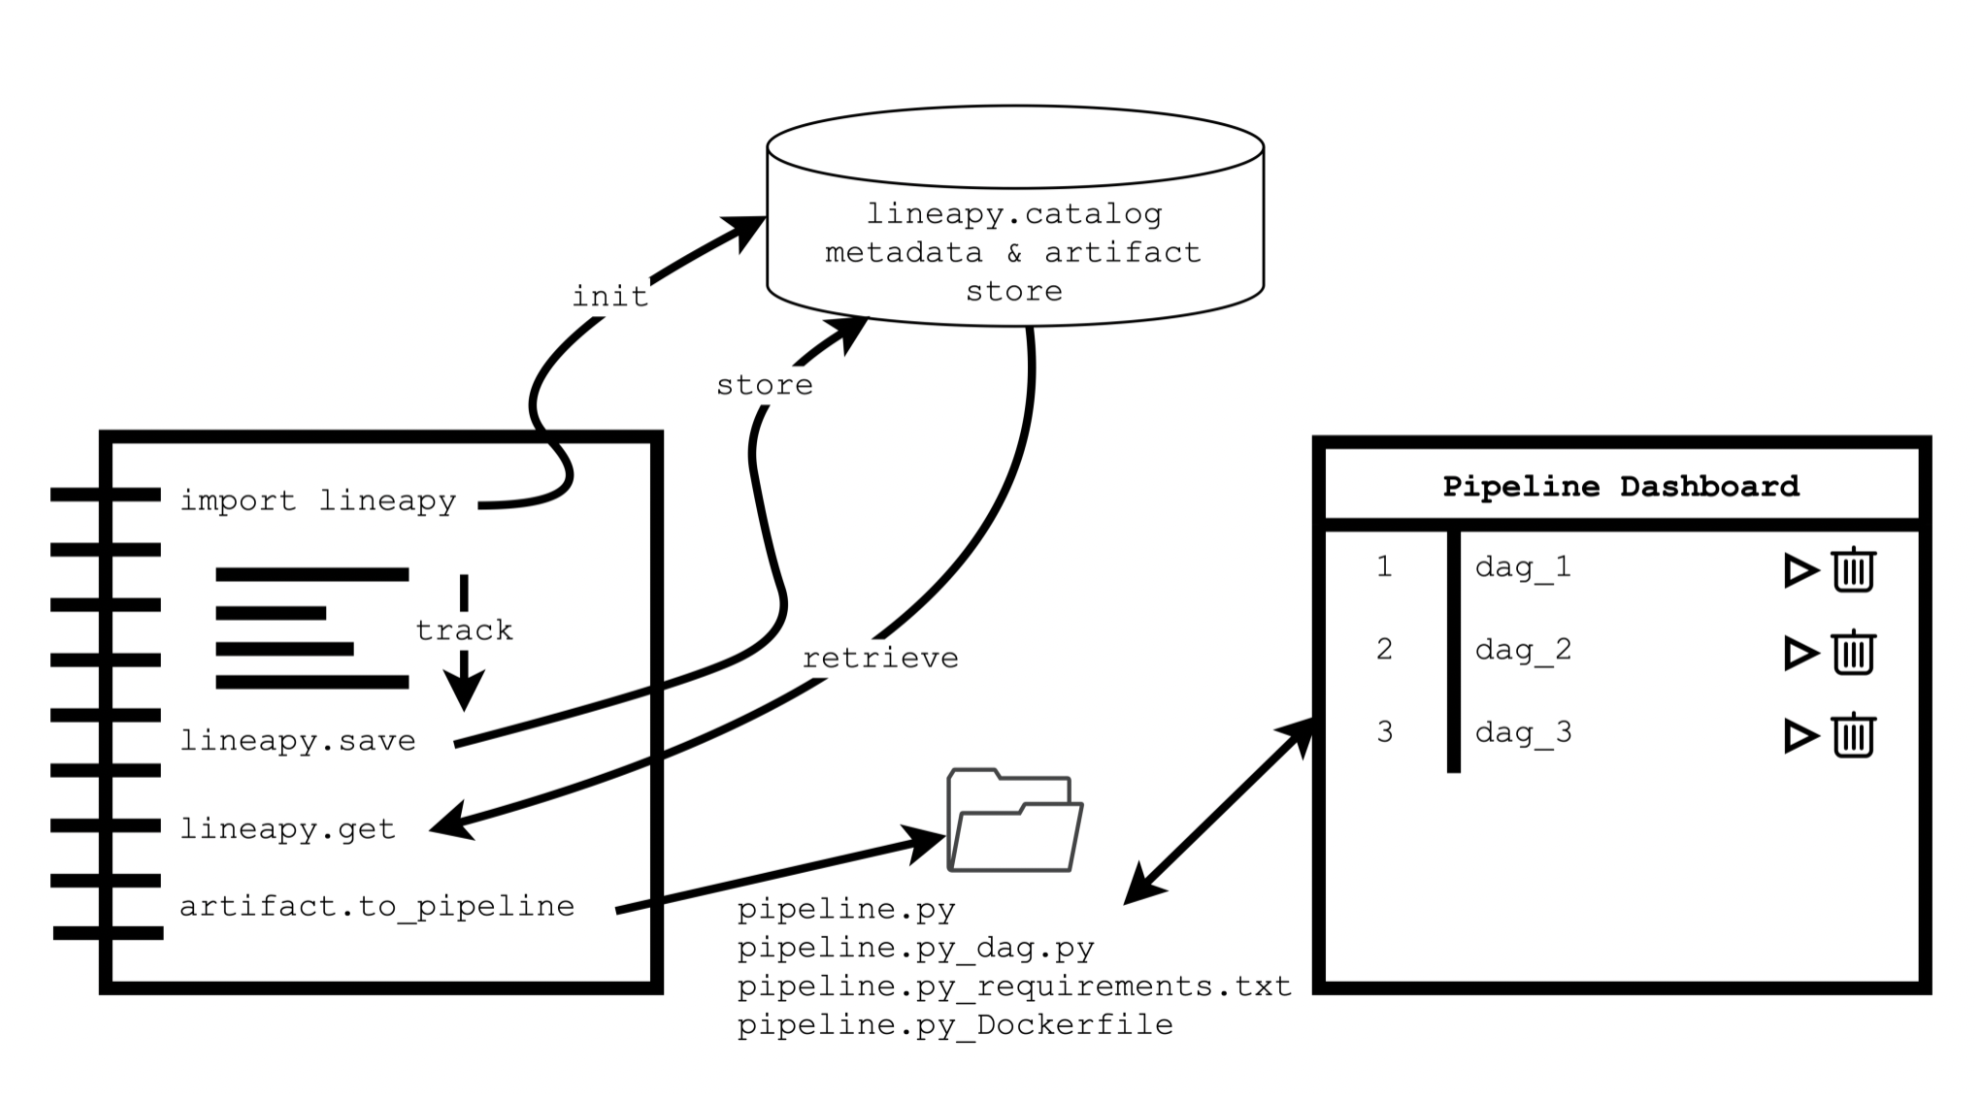

<div class="alert alert-info">

You can ignore `# NBVAL_*` comments in certain cell blocks. They are for passing unit tests only, which we do to make sure the examples are always functional as we update the codebase.

</div>

In [1]:
# NBVAL_IGNORE_OUTPUT

import os
import lineapy
import pandas as pd
import matplotlib.pyplot as plt

## Exploring data

Let's load the toy data to use.

In [2]:
# NBVAL_IGNORE_OUTPUT

# Load data
df = pd.read_csv("https://raw.githubusercontent.com/LineaLabs/lineapy/main/examples/tutorials/data/iris.csv")

In [3]:
# View data
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


Now, we might be interested in seeing if the data reflects differences between iris types. Let's compare their petal traits.

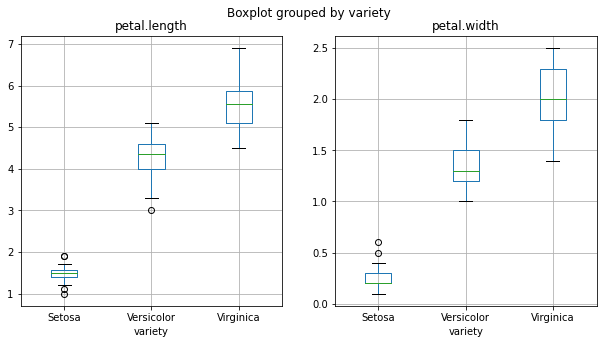

In [4]:
# Plot petal length/width by iris type
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
df.boxplot("petal.length", "variety", ax=ax[0])
df.boxplot("petal.width", "variety", ax=ax[1])
plt.show()

Overall, we observe noticeable differences between iris types, especially between Setosa and Virginica. Let's quantify differences between the two types.

In [5]:
# Calculate averages for Setosa
avg_length_setosa = df.query("variety == 'Setosa'")["petal.length"].mean()
avg_width_setosa = df.query("variety == 'Setosa'")["petal.width"].mean()

# Calculate averages for Virginica
avg_length_virginica = df.query("variety == 'Virginica'")["petal.length"].mean()
avg_width_virginica = df.query("variety == 'Virginica'")["petal.width"].mean()

# Calculate differences
diff_avg_length = avg_length_setosa - avg_length_virginica
diff_avg_width = avg_width_setosa - avg_width_virginica

In [6]:
# NBVAL_IGNORE_OUTPUT

# View result
print("Difference in average length:", diff_avg_length)
print("Difference in average width:", diff_avg_width)

Difference in average length: -4.09
Difference in average width: -1.7800000000000002


## Storing an artifact with `save()`

Say we are particularly interested in tracking the average length difference between Setosa and Virginica. For instance, we might want to use this variable later for population-level modeling of the two species.

The `save()` method allows us to store a variable's value *and* history as a data type called `LineaArtifact`. Note that `LineaArtifact` holds more than the final state of the variable &mdash; it also captures the complete development process behind the variable, which allows for full reproducibility. For more information about artifacts in LineaPy, please check the [Concepts](https://docs.lineapy.org/en/latest/fundamentals/concepts.html) section.

The method requires two arguments: the variable to save and the string name to save it as. It returns the saved artifact.

In [7]:
# Store the variable as an artifact
length_artifact = lineapy.save(diff_avg_length, "iris_diff_avg_length")

# Check object type
print(type(length_artifact))

<class 'lineapy.graph_reader.apis.LineaArtifact'>


`LineaArtifact` object has two key APIs:

- `.get_value()` returns value of the artifact, e.g., an integer or a dataframe
- `.get_code()` returns minimal essential code to create the value

Hence, for the current artifacts, we see:

In [8]:
# Check the value of the artifact
print(length_artifact.get_value())

-4.09


<div class="alert alert-info">

☝️ ☝️ ☝️ **[FEATURE] Retrieve artifact value** ☝️ ☝️ ☝️

</div>

In [9]:
# Check minimal essential code to generate the artifact
print(length_artifact.get_code())

import pandas as pd

df = pd.read_csv(
    "https://raw.githubusercontent.com/LineaLabs/lineapy/main/examples/tutorials/data/iris.csv"
)
avg_length_setosa = df.query("variety == 'Setosa'")["petal.length"].mean()
avg_length_virginica = df.query("variety == 'Virginica'")["petal.length"].mean()
diff_avg_length = avg_length_setosa - avg_length_virginica



<div class="alert alert-info">

☝️ ☝️ ☝️ **[FEATURE] Retrieve cleaned artifact code** ☝️ ☝️ ☝️

</div>

Note that irrelevant code has been stripped out (e.g., operations relating to `diff_avg_width` only).

<div class="alert alert-info">

**Note:** If you want, you can retrieve the artifact's full original code with `artifact.get_session_code()`.

</div>

## Listing artifacts with `catalog()`

Of course, with time passing, we may not remember what artifacts we saved and under what names. The `catalog()` method allows us to see the list of all previously saved artifacts, like so:

In [10]:
# NBVAL_IGNORE_OUTPUT

# List all saved artifacts
lineapy.catalog()

iris_diff_avg_length:0 created on 2022-05-16 20:54:53.361836

<div class="alert alert-info">

☝️ ☝️ ☝️ **[FEATURE] Retrieve all artifacts** ☝️ ☝️ ☝️

</div>

Note that the catalog records each artifact’s creation time, which means that multiple versions can be stored under the same artifact name. Hence, if we save `iris_diff_avg_length` artifact again, we get:


In [11]:
# NBVAL_IGNORE_OUTPUT

# Save the same artifact again
lineapy.save(diff_avg_length, "iris_diff_avg_length")

# List all saved artifacts
lineapy.catalog()

iris_diff_avg_length:0 created on 2022-05-16 20:54:53.361836
iris_diff_avg_length:1 created on 2022-05-16 20:55:01.629803

## Retrieving an artifact with `get()`

We can retrieve any stored artifact using the `get()` method. This comes in handy when we work across multiple sessions/phases of a project (or even across different projects) as we can easily build on the previous work.

For example, say we have done other exploratory analyses and are finally starting our work on population-level modeling. This is likely done in a new Jupyter notebook (possibly in a different subdirectory) and we need an easy way to load artifacts from our past work. We can use the `get()` method for this.

The method takes the string name of the artifact as its argument and returns the corresponding artifact, like so:

In [12]:
# Retrieve a saved artifact
length_artifact2 = lineapy.get("iris_diff_avg_length")

# Confirm the artifact holds the same value and code as before
print(length_artifact2.get_value())
print(length_artifact2.get_code())

-4.09
import pandas as pd

df = pd.read_csv(
    "https://raw.githubusercontent.com/LineaLabs/lineapy/main/examples/tutorials/data/iris.csv"
)
avg_length_setosa = df.query("variety == 'Setosa'")["petal.length"].mean()
avg_length_virginica = df.query("variety == 'Virginica'")["petal.length"].mean()
diff_avg_length = avg_length_setosa - avg_length_virginica



By default, the `get()` method retrieves the latest version of the given artifact. To retrieve a particular version of the artifact, we can specify the value of the optional argument `version`, like so:

In [13]:
# NBVAL_IGNORE_OUTPUT

# Get version info of the retrieved artifact
desired_version = length_artifact2.version

# Check the version info
print(desired_version)
print(type(desired_version))

1
<class 'int'>


In [14]:
# NBVAL_IGNORE_OUTPUT

# Retrieve the same version of the artifact
length_artifact3 = lineapy.get("iris_diff_avg_length", version=desired_version)

# Confirm the right version has been retrieved
print(length_artifact3.name)
print(length_artifact3.version)

iris_diff_avg_length
1


## Using artifacts to build pipelines

Say we are now also interested in using the average *width* difference in our population-level modeling, in which case we will store it as an artifact too:

In [15]:
# Store the width variable as an artifact too
width_artifact = lineapy.save(diff_avg_width, "iris_diff_avg_width")

Now consider the case where our source data (i.e. `iris.csv`) gets updated. Moreover, the update is not a one-time event; the data is planned to be updated on a regular basis as new samples arrive.

Since the `iris_diff_avg_length` and `iris_diff_avg_width` artifact were derived from the `iris.csv` data, this means that we need to rerun each artifact's code lest its value be stale. Given the recurring updates in the source data, we may want to build and schedule a pipeline to automatically rerun the code of both artifacts on a regular basis.

Having the complete development process captured in each artifact, LineaPy makes it easy for us to to turn these two artifacts into a deployable pipeline. For instance, [Airflow](https://airflow.apache.org/) is a popular tool for pipeline building and management, and we can turn the artifacts into a set of files that can be deployed as an Airflow DAG, like so:

In [16]:
# NBVAL_IGNORE_OUTPUT

# Build an Airflow pipeline with both length and width artifacts
lineapy.to_pipeline(
    artifacts=[length_artifact.name, width_artifact.name],
    pipeline_name="demo_pipeline",
    framework="AIRFLOW",
    output_dir="output/00_api_basics/demo_pipeline/",
)

Pipeline source generated in the directory: output/00_api_basics/demo_pipeline

Generated python module demo_pipeline.py

Generated Dockerfile demo_pipeline_Dockerfile

Generated requirements file demo_pipeline_requirements.txt

Added Airflow DAG named demo_pipeline_dag. Start a run from the Airflow UI or CLI.

PosixPath('output/00_api_basics/demo_pipeline')

where

- `artifacts` is the list of artifact names to be used for the pipeline
- `pipeline_name` is the name of the pipeline
- `output_dir` is the location to put the files for running the pipeline
- `framework` is the name of orchestration framework to use (currently supports `SCRIPTS` and `AIRFLOW`)

And we see the following files have been generated:

In [17]:
# NBVAL_IGNORE_OUTPUT

# Check the generated files for running the pipeline
os.listdir("output/00_api_basics/demo_pipeline/")

['demo_pipeline_requirements.txt',
 'demo_pipeline_Dockerfile',
 'demo_pipeline_dag.py',
 'demo_pipeline.py']

where

- `[PIPELINE-NAME].py` contains the artifact’s cleaned-up code packaged as a function
- `[PIPELINE-NAME]_dag.py` uses the packaged function to define the pipeline
- `[PIPELINE-NAME]_requirements.txt` lists dependencies for running the pipeline
- `[PIPELINE-NAME]_Dockerfile` contains commands to set up the environment to run the pipeline

Specifically, we have `demo_pipeline.py` looking as follows:

In [18]:
%cat output/00_api_basics/demo_pipeline/demo_pipeline.py

def iris_diff_avg_length():
    import pandas as pd

    df = pd.read_csv(
        "https://raw.githubusercontent.com/LineaLabs/lineapy/main/examples/tutorials/data/iris.csv"
    )
    avg_length_setosa = df.query("variety == 'Setosa'")["petal.length"].mean()
    avg_length_virginica = df.query("variety == 'Virginica'")["petal.length"].mean()
    diff_avg_length = avg_length_setosa - avg_length_virginica


def iris_diff_avg_width():
    import pandas as pd

    df = pd.read_csv(
        "https://raw.githubusercontent.com/LineaLabs/lineapy/main/examples/tutorials/data/iris.csv"
    )
    avg_width_setosa = df.query("variety == 'Setosa'")["petal.width"].mean()
    avg_width_virginica = df.query("variety == 'Virginica'")["petal.width"].mean()
    diff_avg_width = avg_width_setosa - avg_width_virginica


We can see that LineaPy used artifacts to automatically 1) clean up their code to retain only essential operations and 2) package the cleaned-up code into importable functions.

And we see `demo_pipeline_dag.py` automatically composing an Airflow DAG with these functions:

In [19]:
%cat output/00_api_basics/demo_pipeline/demo_pipeline_dag.py

import os

import demo_pipeline
from airflow import DAG
from airflow.operators.python_operator import PythonOperator
from airflow.utils.dates import days_ago

default_dag_args = {"owner": "airflow", "retries": 2, "start_date": days_ago(1)}

dag = DAG(
    dag_id="demo_pipeline_dag",
    schedule_interval="*/15 * * * *",
    max_active_runs=1,
    catchup=False,
    default_args=default_dag_args,
)


iris_diff_avg_length = PythonOperator(
    dag=dag,
    task_id="iris_diff_avg_length_task",
    python_callable=demo_pipeline.iris_diff_avg_length,
)

iris_diff_avg_width = PythonOperator(
    dag=dag,
    task_id="iris_diff_avg_width_task",
    python_callable=demo_pipeline.iris_diff_avg_width,
)


These files, once placed in the location that Airflow expects (usually `dag/` under Airflow’s home directory), should let us immediately execute the pipeline from the UI or CLI.

For a more detailed illustration of pipeline building, please check [this](https://docs.lineapy.org/en/latest/guide/build_pipelines/index.html#) tutorial.

## Recap

In this tutorial, we learned basic functionalities of LineaPy including how to save, browse, and retrieve an artifact. We saw that a LineaPy artifact stores not only the value of a variable but also its full development code. This then helps to automate time-consuming, manual steps in a data science workflow such as code cleanup and pipeline building, hence helping data scientists move faster towards productionization and impact.